## Main takeaways:

### 1. Threshold Analysis
* Using a **20 minute threshold value** yields 272 regions who crossed threshold at various times
    * 51211.52 carless households crossed 20 minute threshold
    * 34095.0 people below poverty crossed 20 minute threshold
    * Important note: average change for people who cross this threshold is 2 minutes
    
    
* Using a **30 minute threshold value** yields 431 regions who crossed threshold at various times
    * 43404.52 carless households who have crossed 30 minute threshold
    * 40100.0 people below poverty crossed 30 minute threshold
    * Important note: average change for people who cross this threshold is 3 minutes
    
    
### 2. Simple Increase Analysis
* 374 regions had increase in **10 minutes** to nearest clinic
  * 4155.35 of those carless were carless
  * 14085.0 of those people were below poverty value
* 96 regions had increase in **15 minutes** to nearest clinic
  * 1258.39 of those households were carless
  * 4960.0 of those people below poverty value
* 17 regions had increase in **20 minutes** to nearest clinic
  * 456.42 of those households were carless
  * 685.0 of those people were below poverty value




In [2]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
data_dir = '/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/'

In [1]:
LICOdata = pd.read_csv(data_dir + 'LICODATADALevel.csv')

NameError: name 'pd' is not defined

In [391]:
carless = gpd.read_file('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/GTAWithVarsForMaps/GTAWithVarsForMaps.shp')
employ = pd.read_csv(data_dir + 'DA employment counts/DA_EMP_2016.csv')
travel_diff = gpd.read_file(data_dir + 'results/travel_time_diff/travel_time_diff_2.shp')
clinics_gdf = gpd.read_file('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/clinic_shp/clean_clinics_v3.shp')
low_income_cutoff = pd.read_csv('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/low_income_cutoff/LICODataDALevel.csv')
DA_income = pd.read_csv(data_dir + 'census_data/DA_income.csv')

In [392]:
carless['DAUID'] = carless['DAUID'].astype(int)

In [393]:
carless = carless.merge(DA_income, left_on='DAUID', right_on='GeoUID')

In [394]:
carless['PCTCarless'] = carless['PCTCarless'] * 0.01

In [395]:
carless['pop_carless'] = carless['PCTCarless'] * carless['Population']

In [396]:
carless = carless.merge(travel_diff, left_on='DAUID', right_on='fromId')

In [397]:
carless.drop_duplicates('DAUID')['pop_carless'].sum()

772015.3584014449

## Threshold 20 Minutes

In [311]:
carless['2019_u20'] = carless['tt_2019'] < 20
carless['2020_o20'] = carless['tt_2020'] >= 20

In [312]:
carless['thres'] = (carless['2019_u20'] == True) & (carless['2020_o20'] == True)

In [313]:
carless = gpd.GeoDataFrame(carless, geometry='geometry_y')

/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


<AxesSubplot:>

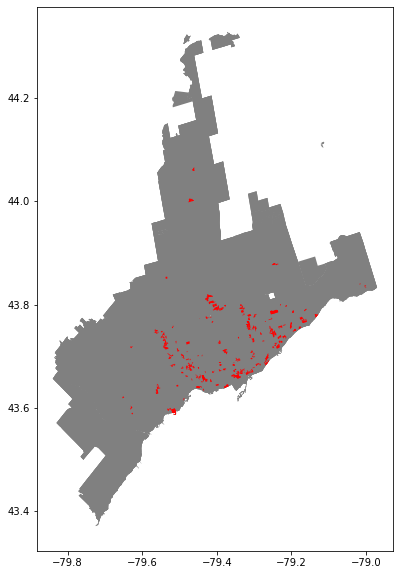

In [314]:
fig, ax = plt.subplots(figsize=(10,10))
carless.plot(ax=ax, color='grey')
carless[carless['thres']==1].plot(column='thres', color = 'red', ax=ax)

In [315]:
len(carless[carless['thres'] == True]['DAUID'].unique())

272

In [316]:
np.nansum(carless[carless['thres'] == True]['pop_carless'].unique())

51211.52998421104

In [317]:
carless[carless['thres'] == True]['diff'].describe()

count    442.000000
mean       2.341629
std        1.404087
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        7.000000
Name: diff, dtype: float64

In [318]:
low_income_cutoff = pd.read_csv('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/low_income_cutoff/LICODataDALevel.csv')

In [324]:
carless[carless['thres']==True].merge(low_income_cutoff, left_on='GeoUID_y', right_on='COL0').drop_duplicates('DAUID')['COL7'].sum()

34095.0

## Threshold 30 Minutes

In [337]:
carless['2019_u20'] = carless['tt_2019'] < 30
carless['2020_o20'] = carless['tt_2020'] >= 30

In [338]:
carless['thres'] = (carless['2019_u20'] == True) & (carless['2020_o20'] == True)

In [339]:
carless['thres'].value_counts()

False    26821
True       665
Name: thres, dtype: int64

In [340]:
carless = gpd.GeoDataFrame(carless, geometry='geometry_y')

/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


<AxesSubplot:>

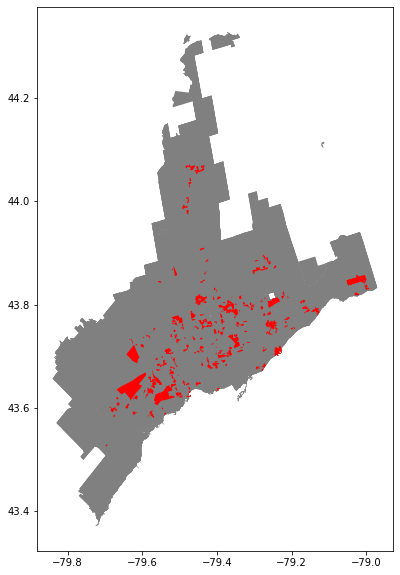

In [341]:
fig, ax = plt.subplots(figsize=(10,10))
carless.plot(ax=ax, color='grey')
carless[carless['thres']==1].plot(column='thres', color = 'red', ax=ax)

In [342]:
len(carless[carless['thres'] == True]['DAUID'].unique())

431

In [343]:
np.nansum(carless[carless['thres'] == True]['pop_carless'].unique())

43404.52714931643

In [344]:
carless[carless['thres'] == True]['diff'].describe()

count    665.000000
mean       3.085714
std        2.117097
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max       22.000000
Name: diff, dtype: float64

In [345]:
low_income_cutoff = pd.read_csv('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/low_income_cutoff/LICODataDALevel.csv')


In [346]:
carless[carless['thres']==True].merge(low_income_cutoff, left_on='GeoUID_y', right_on='COL0').drop_duplicates('DAUID')['COL7'].sum()

40100.0

## Increase by 10 Mins

In [439]:
carless['thres'] = carless['diff'] >= 10

In [440]:
carless['thres'].value_counts()

False    27112
True       374
Name: thres, dtype: int64

In [441]:
carless = gpd.GeoDataFrame(carless, geometry='geometry_y')

/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


<AxesSubplot:>

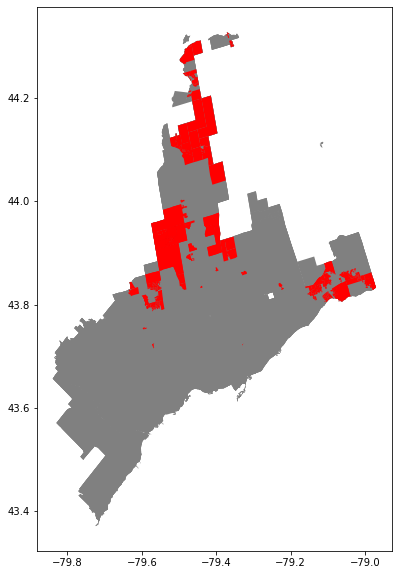

In [442]:
fig, ax = plt.subplots(figsize=(10,10))
carless.plot(ax=ax, color='grey')
carless[carless['thres']==1].plot(column='thres', color = 'red', ax=ax)

In [443]:
thres_carless = carless[carless['thres']==1]

### Number of carless who now have >=10 min increase in travel time if taking public transport

In [444]:
thres_carless.drop_duplicates('DAUID')['pop_carless'].sum()

4155.35259913088

### Number of low income who now have >=10 min increase in travel time if taking public transport

In [445]:
low_income_cutoff = pd.read_csv('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/low_income_cutoff/LICODataDALevel.csv')
thres_carless[thres_carless['thres']==True].merge(low_income_cutoff, left_on='GeoUID_y', right_on='COL0').drop_duplicates('DAUID')['COL7'].sum()

14085.0

## Increase by 15 Mins

In [430]:
carless['thres'] = carless['diff'] >= 15

In [431]:
carless['thres'].value_counts()

False    27390
True        96
Name: thres, dtype: int64

In [432]:
carless = gpd.GeoDataFrame(carless, geometry='geometry_y')

/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


<AxesSubplot:>

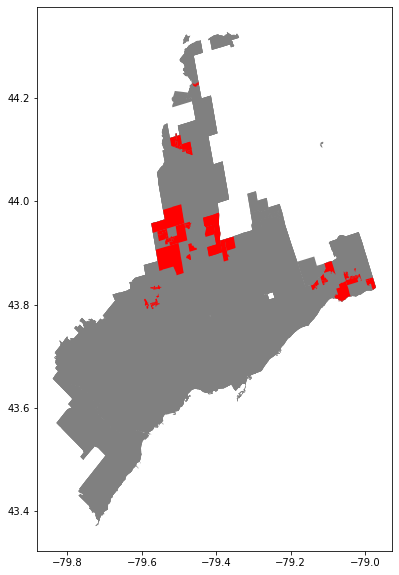

In [433]:
fig, ax = plt.subplots(figsize=(10,10))
carless.plot(ax=ax, color='grey')
carless[carless['thres']==1].plot(column='thres', color = 'red', ax=ax)

In [434]:
thres_carless = carless[carless['thres']==1]

### Number of carless who now have >=15 min increase in  travel time if taking public transport

In [435]:
np.nansum(thres_carless['pop_carless'].unique())

1258.3937574725471

### Number of low income who now have >=15 min increase in travel time if taking public transport

In [437]:
low_income_cutoff = pd.read_csv('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/low_income_cutoff/LICODataDALevel.csv')
thres_carless[thres_carless['thres']==True].merge(low_income_cutoff, left_on='GeoUID_y', right_on='COL0').drop_duplicates('DAUID')['COL7'].sum()

4960.0

## Increase by 20 Mins

In [413]:
carless['thres'] = carless['diff'] >= 20

In [414]:
carless['thres'].value_counts()

False    27469
True        17
Name: thres, dtype: int64

In [415]:
carless = gpd.GeoDataFrame(carless, geometry='geometry_y')

/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


<AxesSubplot:>

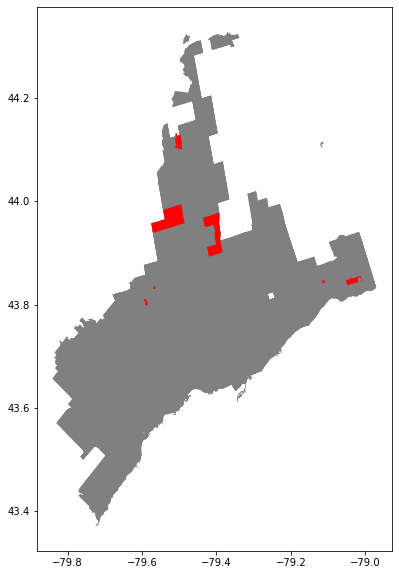

In [416]:
fig, ax = plt.subplots(figsize=(10,10))
carless.plot(ax=ax, color='grey')
carless[carless['thres']==1].plot(column='thres', color = 'red', ax=ax)

In [417]:
thres_carless = carless[carless['thres']==1]

### Number of carless who now have >=20 min increase in  travel time if taking public transport

In [418]:
np.nansum(thres_carless['pop_carless'].unique())

456.42773470533143

### Number of low income who now have >=20 min increase in travel time if taking public transport

In [421]:
low_income_delays.drop_duplicates('COL0')['COL7'].sum()

4960.0